<a href="https://colab.research.google.com/github/SallyAfua/AIMS-PROJECT-WORK/blob/master/sahras_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data cleaning

In [117]:
# setting the path where data are located
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [118]:
# reading the data
import pandas as pd

uk30_df = pd.read_csv("/content/gdrive/MyDrive/df_UK_30.csv", index_col=0)

# we dont have enough other data after 2017 so just keep from 
uk30_df = uk30_df[uk30_df.Year < 2018] 
uk30_df = uk30_df[uk30_df.Year > 2000] 
uk30_df.head(3)

,"Adult literacy rate, population 15+ years, female (%)",Year,"School life expectancy, primary, gender parity index (GPI)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)",10.5.1 - Return on assets (%) - FI_FSI_FSERA,Individuals using the Internet (% of population),"4.a.1 - Proportion of schools with access to basic drinking water, by education level (%) - SE_ACS_H2O - Primary",Mobile cellular subscriptions (per 100 people),Cartagena Protocol on Biosafety,15.5.1 - Red List Index - ER_RSK_LST,12.5.1 - Municipal waste recycled (Tonnes) - EN_MWT_RCYV,16.3.2 - Unsentenced detainees as a proportion of overall prison population (%) - VC_PRS_UNSNT,"Share of youth not in education, employment or training, total (% of youth population)","15.a.1 - Total official development assistance for biodiversity, by recipient countries (millions of constant 2018 United States dollars) - DC_ODA_BDVL",Informal employment (% of total non-agricultural employment),"7.a.1 - International financial flows to developing countries in support of clean energy research and development and renewable energy production, including in hybrid systems (millions of constant United States dollars) - EG_IFF_RANDN","8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP","Youth literacy rate, population 15-24 years, male (%)",Universal suffrage to women (OWID based on Paxton et al (2006)),"Informal employment, female (% of total non-agricultural employment)",13.b.1 - Number of least developed countries and small island developing States with national adaptation plans (Number) - EN_NAA_PLAN_DV,11.5.2 - Direct economic loss attributed to disasters relative to GDP (%) - VC_DSR_LSGP,17.5.1 - Number of countries with an inforce bilateral investment treaty (BIT) (Number) - SG_CPA_INFORCE_BIT,"15.9.1 - Countries that established national targets in accordance with Aichi Biodiversity Target 2 of the Strategic Plan for Biodiversity 2011-2020 in their National Biodiversity Strategy and Action Plans (1 = YES; 0 = NO) - ER_BDY_ABT2NP - National target reflecting ABT2 exists and progress is there, but at as insufficient rate",17.5.1 - Number of countries with a signed bilateral investment treaty (BIT) (Number) - SG_CPA_SIGN_BIT,15.9.1 - Countries that established national targets in accordance with Aichi Biodiversity Target 2 of the Strategic Plan for Biodiversity 2011-2020 in their National Biodiversity Strategy and Action Plans (1 = YES; 0 = NO) - ER_BDY_ABT2NP - National target reflecting ABT2 exists and progress is on track to achieve it,"3.b.1 - Proportion of the target population with access to affordable medicines and vaccines on a sustainable basis, human papillomavirus (HPV) (%) - SH_ACS_HPV",Access to clean fuels and technologies for cooking (% of population)_x,"4.4.1 - Proportion of youth and adults with information and communications technology (ICT) skills, by sex and type of skill (%) - SE_ADT_ACTS - Both sexes - Creating electronic presentations with presentation software","1.4.2 - Proportion of people with legally recognized documentation of their rights to land out of total adult population, by sex (%) - SP_LGL_LNDDOC - Both sexes","School life expectancy, secondary, male (years)","16.3.1 - Police reporting rate for robbery, by sex (%) - VC_PRR_ROBB - Both sexes",Access to electricity (% of population),Men who own land alone (% of men),Percentage of students at end of lower secondary education achieving at least a minimum proficiency level in mathematics (GEM Report (2017/8)),"Mortality rate, under-5 (per 1,000 live births)","15.8.1 - Countries with an allocation from the national budget to manage the threat of invasive alien species (1 = YES, 0 = NO) - ER_IAS_NATBUD","16.a.1 - Countries with National Human Rights Institutions in compliance with the Paris Principles, A status (1 = YES; 0 = NO) - SG_NHR_IMPLN",10.4.1 - L

In [119]:
[c for c in uk30_df.columns if 'disorder' in c]

['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
 'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
 'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
 '3.5.1 - Coverage of treatment interventions (pharmacological, psychosocial and rehabilitation and aftercare services) for substance use disorders (%) - SH_SUD_TREAT - Amphetamine-type stimulants (ATS)',
 '3.5.1 - Alcohol use disorders, 12-month prevalence (%) - SH_SUD_ALCOL - Both sexes',
 'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)']

In [120]:
# drop columns with too many missing values
uk30_df.dropna(thresh=int(len(uk30_df)*0.7), axis=1, inplace=True) 
uk30_df.shape

(17, 94)

In [121]:
disorder_cols = [c for c in uk30_df.columns if 'disorder' in c]

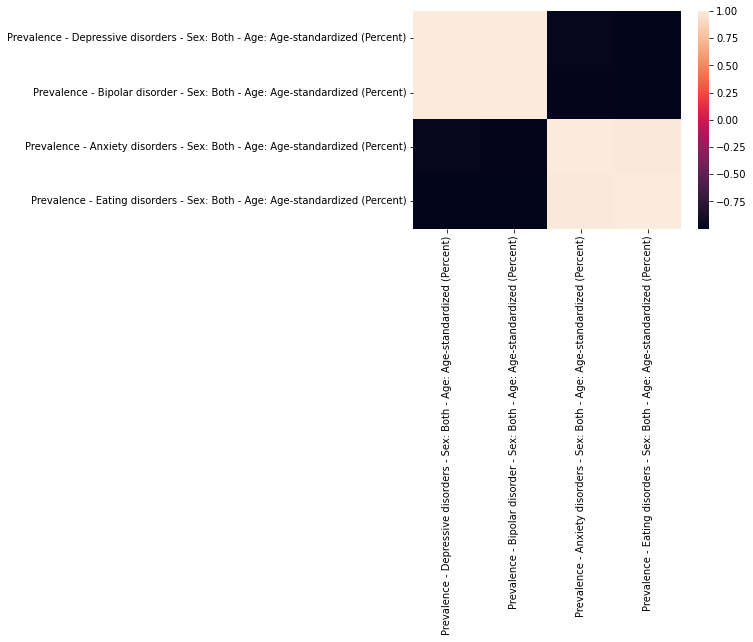

In [122]:
import seaborn as sns
import numpy as np

corr = np.corrcoef(uk30_df[disorder_cols].corr())

sns.heatmap(
    corr, 
    xticklabels=disorder_cols,
    yticklabels=disorder_cols,
)


In [123]:
# drop one of the highly correlated columns 
disorder_cols = [
                  'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
                  'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
                  'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)'
                ]

In [124]:
# drop constant columns
uk30_df = uk30_df.loc[:, uk30_df.nunique() >= 2] # filtering all variables with 2 or more distinct values 
uk30_df.shape
#uk30_df.head(10)

(17, 89)

In [125]:
# possibly categorical columns
uk30_df.columns[uk30_df.nunique() < 5]


Index(['10.2.1 - Proportion of people living below 50 percent of median income (%) - SI_POV_50MI'], dtype='object')

In [126]:
# create a new variable for GDP
gdp_cols = ['GDP per capita, PPP (constant 2017 international $)',  'GDP per capita growth (annual %)']

# check what are the other variables with GDP inside
# [c for c in uk30_df.columns if 'GDP' in c]

In [127]:
# keep only one column if columns too correlated

import numpy as np

cols_to_keep = gdp_cols + disorder_cols

def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[[c for c in un_corr_idx.tolist() if c not in cols_to_keep] + cols_to_keep]
    return df_out

uk30_df_uncorr = trimm_correlated(uk30_df, 0.8)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1203: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(**tight_params)


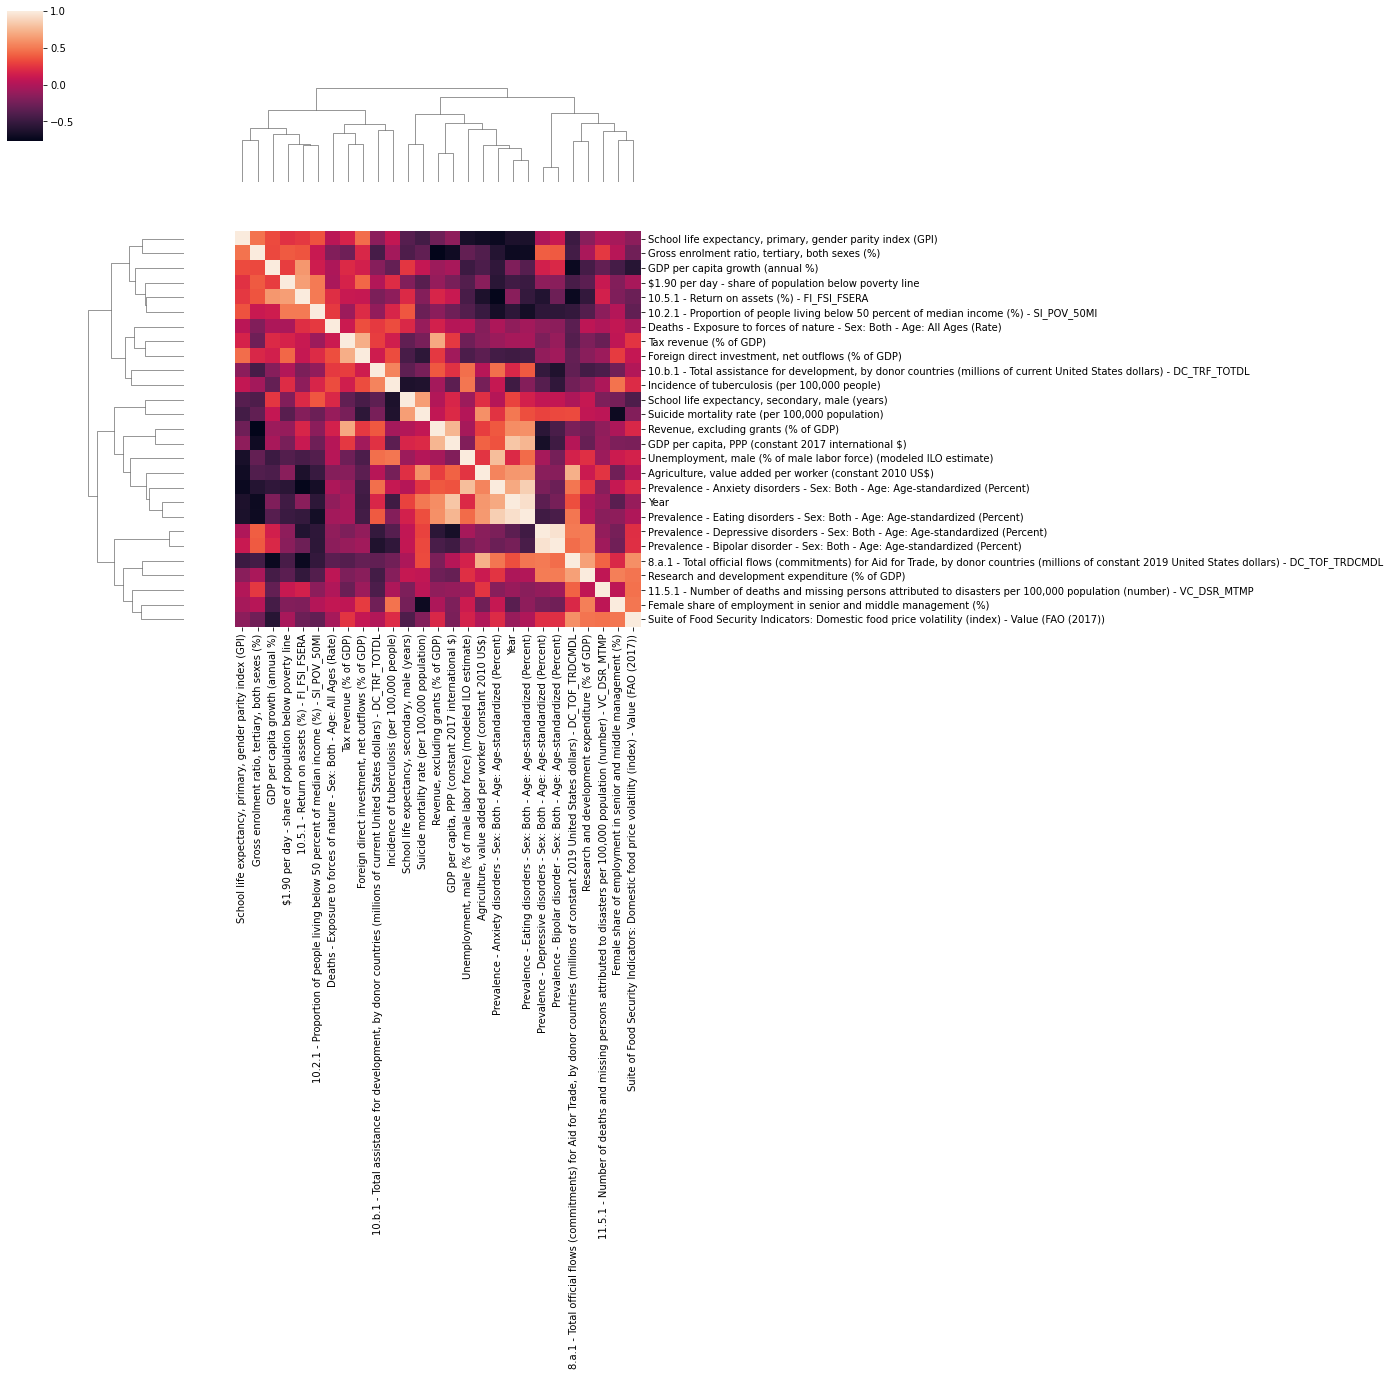

In [128]:
import seaborn as sns

sns.clustermap(
    uk30_df_uncorr.corr()
)


In [129]:
# separate columns by interests

conf_cols = [
    'Incidence of tuberculosis (per 100,000 people)', 
    'Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Rate)', 
    '$1.90 per day - share of population below poverty line',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Unemployment, male (% of male labor force) (modeled ILO estimate)',
    'Air transport, freight (million ton-km)',
    '10.2.1 - Proportion of people living below 50 percent of median income (%) - SI_POV_50MI',
    'Foreign direct investment, net outflows (% of GDP)',
]

mental_health_cols = [
    'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
    'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
    'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
    'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
    'Suicide mortality rate (per 100,000 population)',
]

econ_cols = [
    'GDP per capita, PPP (constant 2017 international $)',  
    'GDP per capita growth (annual %)', 
    'Foreign direct investment, net outflows (% of GDP)',
    'Gross enrolment ratio, tertiary, both sexes (%)'
]

econ_other_cols = [
  '10.5.1 - Return on assets (%) - FI_FSI_FSERA'
  'Tax revenue (% of GDP)',
]

useless = [
    '10.b.1 - Total assistance for development, by donor countries (millions of current United States dollars) - DC_TRF_TOTDL',
    'Research and development expenditure (% of GDP)'
    '8.a.1 - Total official flows (commitments) for Aid for Trade, by donor countries (millions of constant 2019 United States dollars) - DC_TOF_TRDCMDL',

]

dunno = [
    'Total net enrolment rate, primary, gender parity index (GPI)', 
    'School life expectancy, secondary, male (years)',
    'School life expectancy, primary, gender parity index (GPI)',
    'Gross enrolment ratio, tertiary, both sexes (%)',
    'Female share of employment in senior and middle management (%)',
    'Agriculture, value added per worker (constant 2010 US$)'
    'Suite of Food Security Indicators: Domestic food price volatility (index) - Value (FAO (2017))',
]

      #  '10.b.1 - Total assistance for development, by donor countries (millions of current United States dollars) - DC_TRF_TOTDL',
      #  'Incidence of tuberculosis (per 100,000 people)',
      #  'Research and development expenditure (% of GDP)',
      #  '$1.90 per day - share of population below poverty line',
      #  'Revenue, excluding grants (% of GDP)',
      #  'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Rate)',
      #  '11.5.1 - Number of deaths and missing persons attributed to disasters per 100,000 population (number) - VC_DSR_MTMP',


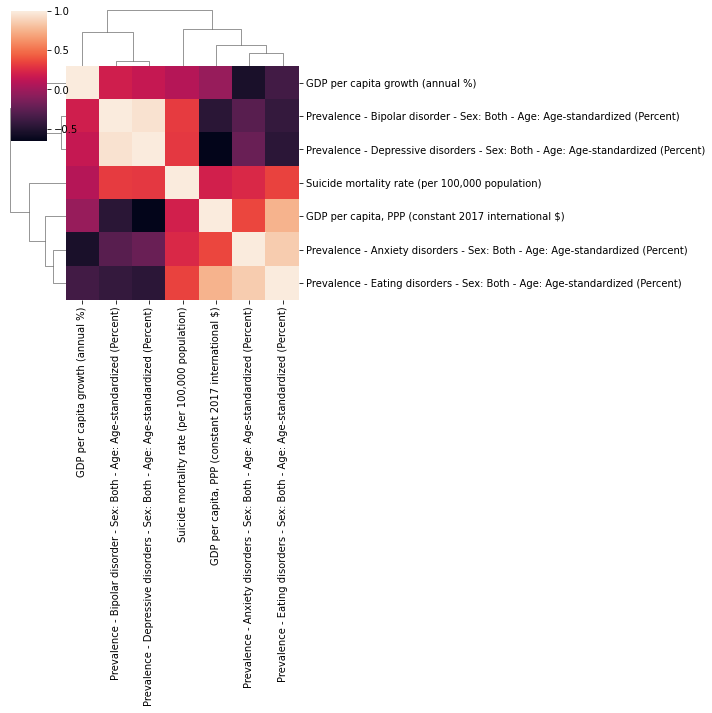

In [130]:
sns.clustermap(
    uk30_df_uncorr[mental_health_cols + gdp_cols].corr(), 
)
# gdp per capita ppp and eating disorders are correlated, gdp growth and anxiety disorder are correlated

From the correlation graph above we can tell that indicators positively related to GDP are Suicide,depression and Bipolar disorders.
Whereas Anxiety and eating disorders are strongly negatively correlated with GDP. 

In [131]:

uk30_df_uncorr.columns

Index(['Year', 'School life expectancy, primary, gender parity index (GPI)',
       '10.5.1 - Return on assets (%) - FI_FSI_FSERA',
       'School life expectancy, secondary, male (years)',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Female share of employment in senior and middle management (%)',
       'Agriculture, value added per worker (constant 2010 US$)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Tax revenue (% of GDP)',
       'Suicide mortality rate (per 100,000 population)',
       '8.a.1 - Total official flows (commitments) for Aid for Trade, by donor countries (millions of constant 2019 United States dollars) - DC_TOF_TRDCMDL',
       '10.b.1 - Total assistance for development, by donor countries (millions of current United States dollars) - DC_TRF_TOTDL',
       'Incidence of tuberculosis (per 100,000 people)',
       'Research and development expenditure (% of GDP)',
       '$1

In [132]:
uk30_df_uncorr.Year.tail(10)

32    2008
33    2009
34    2010
35    2011
36    2012
37    2013
38    2014
39    2015
40    2016
41    2017
Name: Year, dtype: int64

Missing Data imputation.
The default parameter of `SimpleImputer()` is the mean.
This link explains which imputation is most suitable for which data: [link](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)

In [133]:
# imputation 

import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer

nan = np.nan
imputer = KNNImputer()
#imputer = KNNImputer(n_neighbors=5, weights="uniform")
mean_imputed_uk30 = pd.DataFrame(
    imputer.fit_transform(uk30_df_uncorr), 
    columns=uk30_df_uncorr.columns,
)


In [134]:
mean_imputed_uk30.Year.tail(10)

7     2008.0
8     2009.0
9     2010.0
10    2011.0
11    2012.0
12    2013.0
13    2014.0
14    2015.0
15    2016.0
16    2017.0
Name: Year, dtype: float64

In [135]:
# exclusing the year column before standard scaler
df = mean_imputed_uk30.drop(axis = 1, labels='Year')


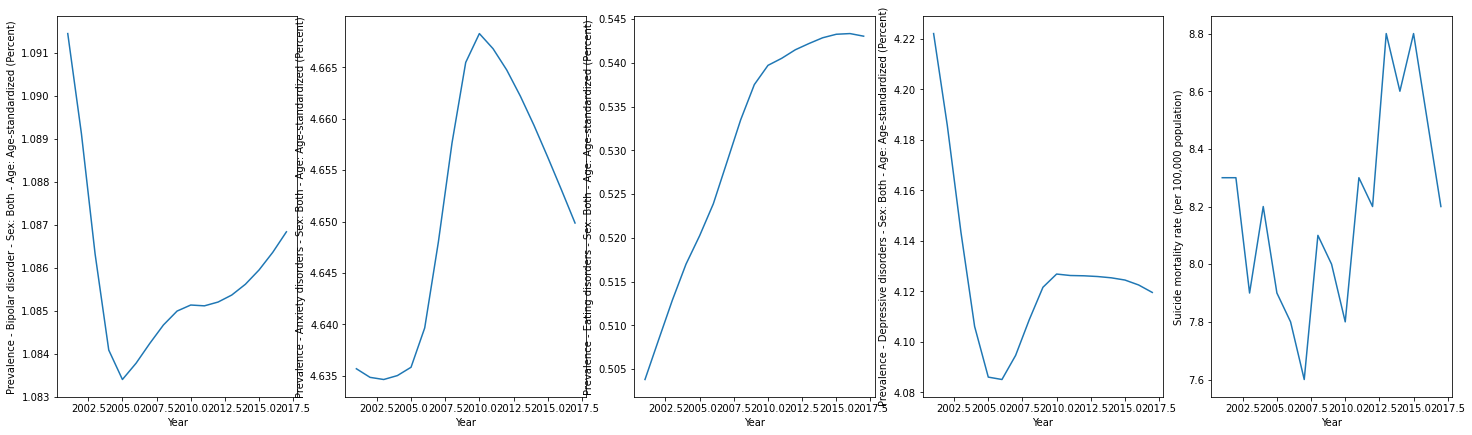

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(ncols=5)
fig.set_figheight(7)
fig.set_figwidth(25)
sns.lineplot(x='Year', y='Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30, ax=axs[0])
sns.lineplot(x='Year', y='Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30, ax=axs[1])
sns.lineplot(x='Year',y='Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30, ax=axs[2])
sns.lineplot(x='Year',y='Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30, ax=axs[3])
sns.lineplot(x='Year',y='Suicide mortality rate (per 100,000 population)', data=mean_imputed_uk30, ax=axs[4])


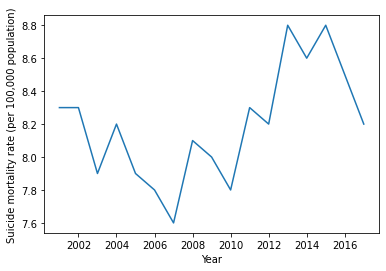

In [137]:
sns.lineplot(x='Year',y='Suicide mortality rate (per 100,000 population)', data=mean_imputed_uk30)

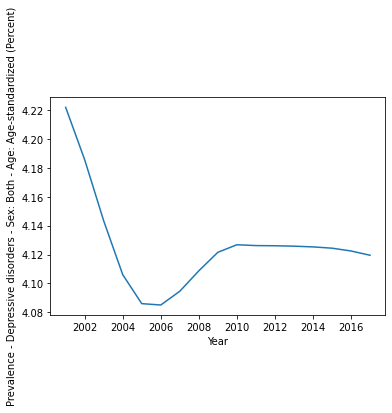

In [138]:
sns.lineplot(x='Year',y='Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30)

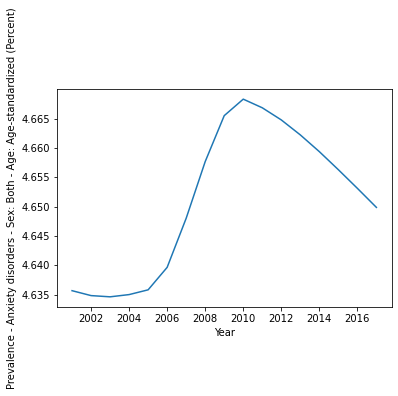

In [139]:
sns.lineplot(x='Year', y='Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30)

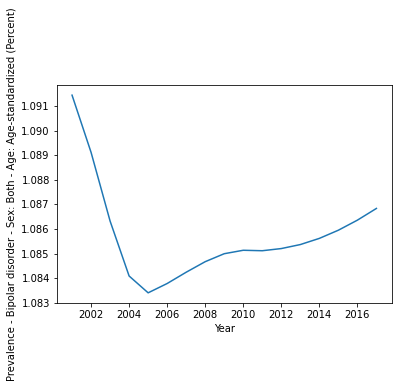

In [140]:
sns.lineplot(x='Year', y='Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30)

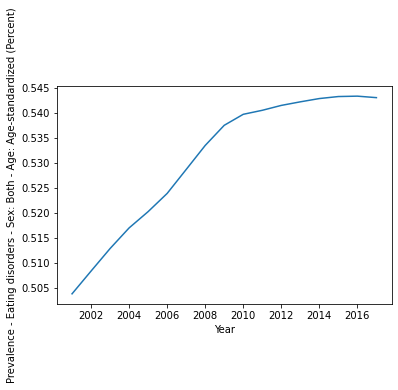

In [141]:
sns.lineplot(x='Year',y='Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30)

In [159]:
# normalisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mean_imputed_uk30 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [160]:
gdp_cols, mental_health_cols

(['GDP per capita, PPP (constant 2017 international $)',
  'GDP per capita growth (annual %)'],
 ['Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
  'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
  'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
  'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
  'Suicide mortality rate (per 100,000 population)'])

In [144]:
#mean_imputed_uk30['GDP per capita, PPP (constant 2017 international $)'] = np.log2(mean_imputed_uk30['GDP per capita, PPP (constant 2017 international $)'])

In [145]:
#mean_imputed_uk30['GDP per capita growth (annual %)'] = np.log10(mean_imputed_uk30['GDP per capita growth (annual %)'])

In [185]:
# run linear regression for prediction and check with corss validation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()
#model = RandomForestRegressor()

scores = cross_val_score(
    model, 
    df[mental_health_cols], 
    df[gdp_cols], 
    cv=7, #len(uk30_df_uncorr)
    )

# linreg = LinearRegression().fit(mean_imputed_uk30[mental_health_cols], mean_imputed_uk30[econ_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [186]:
scores # some scores are nagtive which shows that model is not working 

array([ -3.30561356,  -1.62207525,   0.3248076 ,  -0.22352239,
         0.79632623,  -1.64639684, -24.67565574])

USING TRAIN TEST SPLIT APPROACH

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[mental_health_cols], df[gdp_cols], test_size=0.33, random_state=42)
model = LinearRegression()
#model = RandomForestRegressor()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 92.215%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


Evaluate using leave one out cross evaluation

In [178]:
from sklearn import model_selection
loocv = model_selection.LeaveOneOut()
model = LinearRegression()
results = model_selection.cross_val_score(model, df[mental_health_cols], df[gdp_cols], cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: nan% (nan%)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value

SHUFFLE SPLIT CROSS VALIDATION

In [182]:
test_size = 0.33
num_instances = len(df[mental_health_cols])
seed = 7
kfold = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
model = LinearRegression()
results = model_selection.cross_val_score(model, df[mental_health_cols], df[gdp_cols], cv=kfold)
print("Accuracy: %.3f%% standard deviation (%.3f%%)" % (results.mean()*100.0,results.std()*100.0))

Accuracy: 86.769% standard deviation (6.953%)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [148]:
# # calculate the Pearson's correlation between variables
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# corr = uk30_df.corr()

# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,len(uk30_df.columns),1)
# ax.set_xticks(ticks)
# plt.xticks(rotation=90)
# ax.set_yticks(ticks)
# ax.set_xticklabels(uk30_df.columns)
# ax.set_yticklabels(uk30_df.columns)
# plt.show()

In [149]:
# !!! this one is still not working for me
uk30_df_uncorr = trimm_correlated(uk30_df, 0.8)

In [150]:
# separate columns by interests

conf_cols = [
             'Incidence of tuberculosis (per 100,000 people)', 
             'Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Rate)', 
             '$1.90 per day - share of population below poverty line',
             'Unemployment, total (% of total labor force) (modeled ILO estimate)',
             'Air transport, freight (million ton-km)',
             ]
target_cols = [
               'GDP per capita, PPP (constant 2017 international $)',  
               'GDP per capita growth (annual %)', 
               'Foreign direct investment, net outflows (% of GDP)'
               ]
useless = [
           '10.b.1 - Total assistance for development, by donor countries (millions of current United States dollars) - DC_TRF_TOTDL',
           'Research and development expenditure (% of GDP)'
           ]

dunno = [
         'Total net enrolment rate, primary, gender parity index (GPI)', 
         'School life expectancy, secondary, male (years)'
         ]


In [151]:
uk30_df_uncorr.columns 

Index(['Year', 'School life expectancy, primary, gender parity index (GPI)',
       '10.5.1 - Return on assets (%) - FI_FSI_FSERA',
       'School life expectancy, secondary, male (years)',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Female share of employment in senior and middle management (%)',
       'Agriculture, value added per worker (constant 2010 US$)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Tax revenue (% of GDP)',
       'Suicide mortality rate (per 100,000 population)',
       '8.a.1 - Total official flows (commitments) for Aid for Trade, by donor countries (millions of constant 2019 United States dollars) - DC_TOF_TRDCMDL',
       '10.b.1 - Total assistance for development, by donor countries (millions of current United States dollars) - DC_TRF_TOTDL',
       'Incidence of tuberculosis (per 100,000 people)',
       'Research and development expenditure (% of GDP)',
       '$1

# Adding mental health measures

# Changing the time variable into a datetime format for plotting purposes

In [152]:
# changing year column to time
mean_imputed_uk30['Year'] = pd.to_datetime(mean_imputed_uk30.Year)
mean_imputed_uk30['Year']=mean_imputed_uk30.Year.dt.year
mean_imputed_uk30.Year.head(100)

0     1969
1     1969
2     1969
3     1969
4     1970
5     1970
6     1970
7     1970
8     1970
9     1970
10    1970
11    1970
12    1970
13    1970
14    1970
15    1970
16    1970
Name: Year, dtype: int64

# Impute missing data

In [153]:
import numpy as np
from sklearn.impute import KNNImputer

nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(uk30_df)


array([[2.00100000e+03, 1.00109005e+00, 1.60000000e+01, ...,
        8.80000000e+00, 2.51084247e-01, 5.93087196e+01],
       [2.00200000e+03, 1.00110996e+00, 1.57000000e+01, ...,
        4.70000000e+00, 2.51465854e-01, 6.26015701e+01],
       [2.00300000e+03, 1.00147998e+00, 1.53000000e+01, ...,
        4.50000000e+00, 2.51912506e-01, 6.20863495e+01],
       ...,
       [2.01500000e+03, 9.96825010e-01, 1.13000000e+01, ...,
        4.60000000e+00, 2.58369759e-01, 5.66734486e+01],
       [2.01600000e+03, 9.96825010e-01, 1.13000000e+01, ...,
        4.60000000e+00, 2.60518875e-01, 5.66734486e+01],
       [2.01700000e+03, 9.96825010e-01, 1.08000000e+01, ...,
        4.60000000e+00, 2.62952342e-01, 5.66734486e+01]])

In [154]:
uk30_df.head(10)

,Year,"School life expectancy, primary, gender parity index (GPI)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)",10.5.1 - Return on assets (%) - FI_FSI_FSERA,Individuals using the Internet (% of population),Mobile cellular subscriptions (per 100 people),15.5.1 - Red List Index - ER_RSK_LST,"Share of youth not in education, employment or training, total (% of youth population)","School life expectancy, secondary, male (years)","Mortality rate, under-5 (per 1,000 live births)",10.4.1 - Labour share of GDP (%) - SL_EMP_GTOTL,"Unemployment, male (% of male labor force) (modeled ILO estimate)","Air transport, passengers carried",Female share of employment in senior and middle management (%),9.3.1 - Proportion of small-scale industries in total industry value added (%) - NV_IND_SSIS,"Agriculture, value added per worker (constant 2010 US$)",Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Proportion of seats held by women in national parliaments (%),3.b.1 - Proportion of the target population with access to measles-containing-vaccine second-dose (MCV2) (%) - SH_ACS_MCV2,"Intentional homicides (per 100,000 people)",Tax revenue (% of GDP),"Suicide mortality rate (per 100,000 population)","Health expenditure, public (% of government expenditure)",Exports of goods and services (constant 2010 US$)_x,"GDP per capita, PPP (constant 2017 international $)",9.2.2 - Manufacturing employment as a proportion of total employment (%) - SL_TLF_MANF,6.6.1 - Lakes and rivers permanent water area (% of total land area) - EN_LKRV_PWAP,"8.8.1 - Fatal occupational injuries among employees, by sex and migrant status (per 100,000 employees) - SL_EMP_FTLINJUR - Both sexes - No breakdown","Government expenditure on education, total (% of government expenditure)","Industry as % of total employment -- ILO modelled estimates, May 2017","Tariff rate, applied, weighted mean, all products (%)_x",2.5.2 - Proportion of local breeds classified as being at risk as a share of local breeds with known level of extinction risk (%) - ER_RSK_LBREDS,"Net enrolment rate, pre-primary, male (%)",15.1.2 - Average proportion of Terrestrial Key Biodiversity Areas (KBAs) covered by protected areas (%) - ER_PTD_TERR,"8.a.1 - Total official flows (commitments) for Aid for Trade, by donor countries (millions of constant 2019 United States dollars) - DC_TOF_TRDCMDL",wat_sm,"Manufacturing, value added (% of GDP)","Physicians (per 1,000 people)","10.b.1 - Total assistance for development, by donor countries (millions of current United States dollars) - DC_TRF_TOTDL","8.8.1 - Non-fatal occupational injuries among employees, by sex and migrant status (per 100,000 employees) - SL_EMP_INJUR - Both sexes - No breakdown",...,Research and development expenditure (% of GDP),Forest cover,"15.a.1 - Total official development assistance for biodiversity, by donor countries (millions of constant 2018 United States dollars) - DC_ODA_BDVDL",9.b.1 - Proportion of medium and high-tech manufacturing value added in total value added (%) - NV_IND_TECH,"Personal remittances, received (% of GDP)",Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),$1.90 per day - share of population below poverty line,"12.2.2 - Domestic material consumption per capita, by type of raw material (tonnes) - EN_MAT_DOMCMPC - Total or no breakdown","Air transport, freight (million ton-km)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Exports of goods and services (constant 2010 US$)_y,Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),"Railways, passengers carried (million passenger-km)","Total net enrolment rate, primary, gender parity index (GPI)",GDP per capita growth (annual %),"Revenue, excluding grants (% of GDP)",Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Rate),Deaths - Exposure to forces of natu

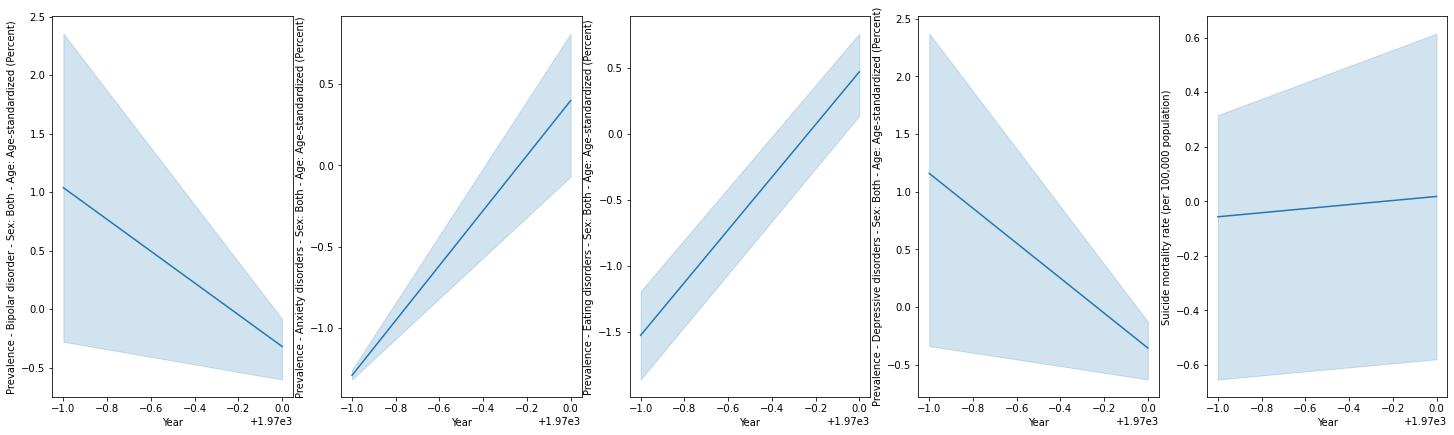

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(ncols=5)
fig.set_figheight(7)
fig.set_figwidth(25)
sns.lineplot(x='Year', y='Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30, ax=axs[0])
sns.lineplot(x='Year', y='Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30, ax=axs[1])
sns.lineplot(x='Year',y='Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30, ax=axs[2])
sns.lineplot(x='Year',y='Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)', data=mean_imputed_uk30, ax=axs[3])
sns.lineplot(x='Year',y='Suicide mortality rate (per 100,000 population)', data=mean_imputed_uk30, ax=axs[4])


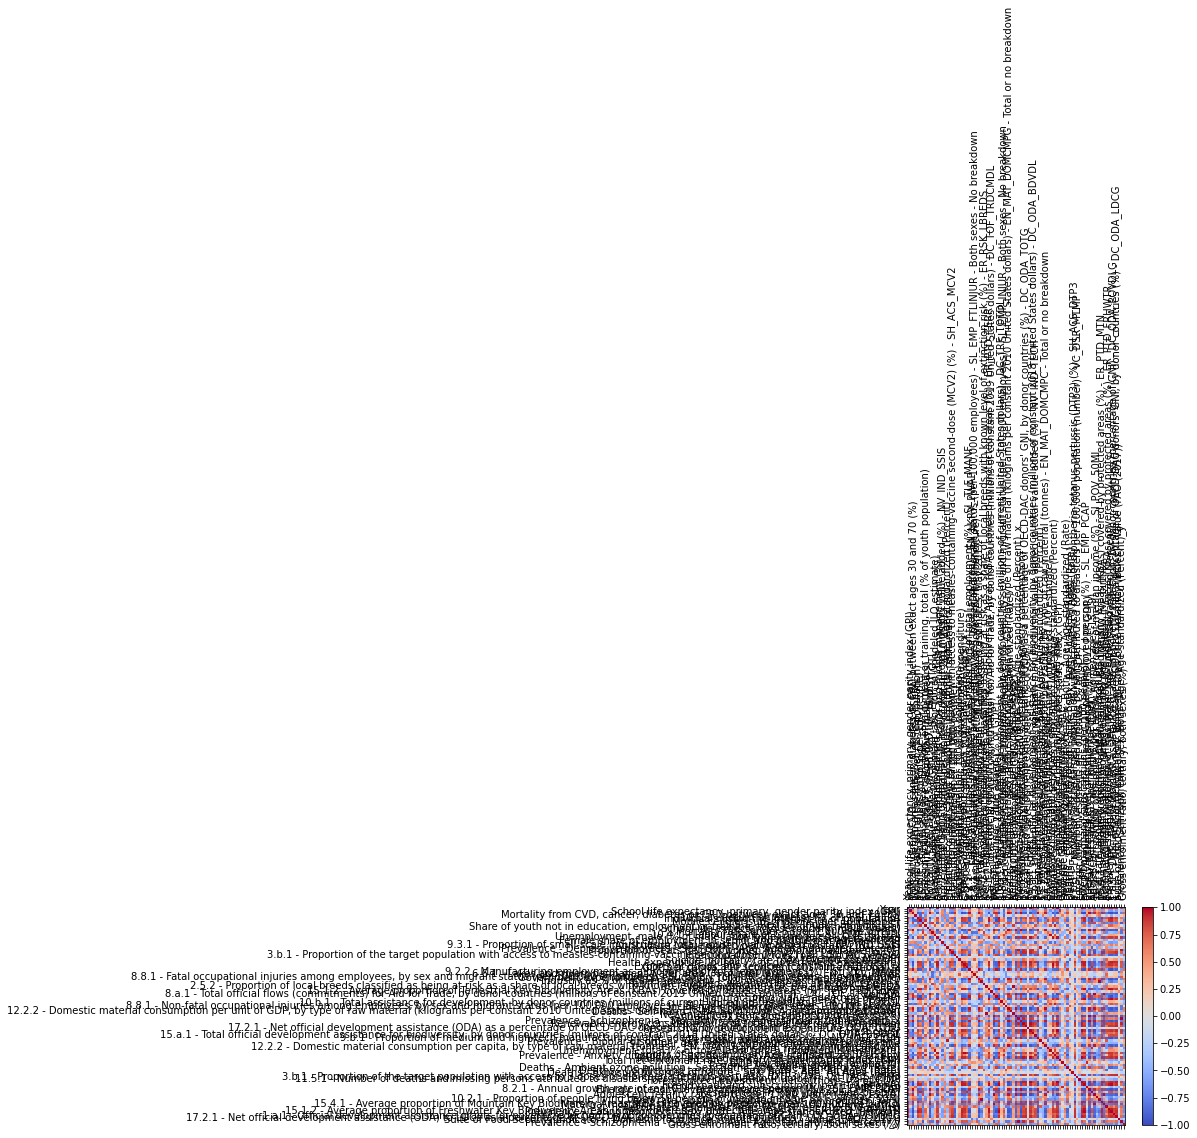

In [156]:
corr = uk30_df.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(uk30_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(uk30_df.columns)
ax.set_yticklabels(uk30_df.columns)
plt.show()

In [157]:
uk30_df.columns

Index(['Year', 'School life expectancy, primary, gender parity index (GPI)',
       'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)',
       '10.5.1 - Return on assets (%) - FI_FSI_FSERA',
       'Individuals using the Internet (% of population)',
       'Mobile cellular subscriptions (per 100 people)',
       '15.5.1 - Red List Index - ER_RSK_LST',
       'Share of youth not in education, employment or training, total (% of youth population)',
       'School life expectancy, secondary, male (years)',
       'Mortality rate, under-5 (per 1,000 live births)',
       '10.4.1 - Labour share of GDP (%) - SL_EMP_GTOTL',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Air transport, passengers carried',
       'Female share of employment in senior and middle management (%)',
       '9.3.1 - Proportion of small-scale industries in total industry value added (%) - NV_IND_SSIS',
       'Agriculture, value added per worker (consta

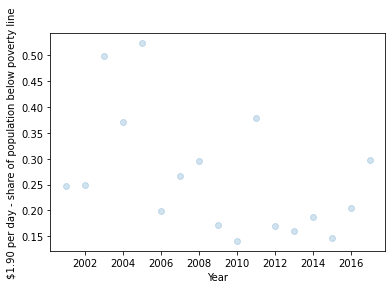

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#sns.jointplot(x = "Incidence of tuberculosis (per 100,000 people)", 
#             y="$1.90 per day - share of population below poverty line",  data=uk30_df, kind = 'kde')

sns.regplot(x = "Year", 
             y="$1.90 per day - share of population below poverty line", data=uk30_df, fit_reg = False, scatter_kws={"alpha": 0.2})

